# Task 2




 Here the time series are displayed in the form of graphs. These graphs are generated from the data collected from automatic meteorological stations in São Paulo, located in Interlagos and Mirante de Santana.


This first code has 8760 entries, one for each hour of each day of 2021. This first visualization allow us to see the temperature oscilations throughout the days, the months and the year for the desired station.

In [10]:
# Import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

             Dia  t_max  t_min
0     01/01/2021   20.8   20.2
1     01/01/2021   20.8   20.4
2     01/01/2021   20.4   20.3
3     01/01/2021   21.0   20.4
4     01/01/2021   21.2   20.9
...          ...    ...    ...
8755  31/12/2021   19.9   19.5
8756  31/12/2021   19.9   19.7
8757  31/12/2021   19.9   19.3
8758  31/12/2021   19.6   19.0
8759  31/12/2021   19.3   19.0

[8760 rows x 3 columns]


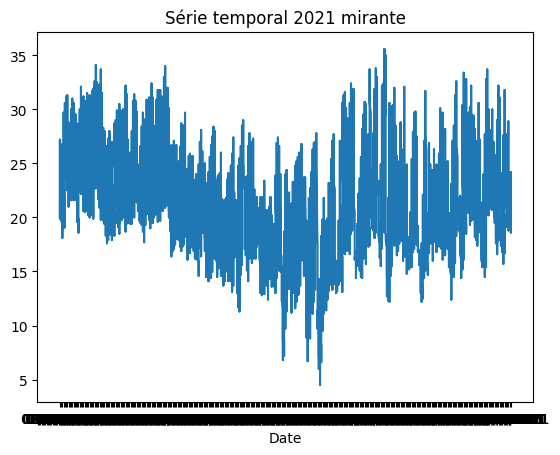

In [11]:
# Read the csv data and define the "data" variable
data = pd.read_csv('dataSeries/saopaulo_mirante_21.csv', sep=";" ,skipinitialspace=True, usecols= ['Dia','t_max', "t_min"]
)
# Creates the axis object    
fig, ax = plt.subplots()
print(data)

# Plot the data as a temporal series graph
ax.plot(data.Dia, data.t_max)

# Defines the axis and the title
ax.set_xlabel('Date')
ax.set_title('Série temporal 2021 mirante')

# Exhibit the plot
plt.show()

This next code calculates the mean of the hourly maximum and minimum temperatures, estabilishing one value for each day. Then, it plots a graph showing us the curves of those maximum and minimum temperatures and compares them between the Sao Paulo weather stations.

            Dia      t_max      t_min
0    01/01/2021  21.920833  20.870833
1    01/02/2021  25.420833  24.066667
2    01/03/2021  23.783333  22.483333
3    01/04/2021  20.291667  19.037500
4    01/05/2021  18.216667  17.166667
..          ...        ...        ...
360  31/05/2021  18.629167  17.808333
361  31/07/2021  10.925000   9.933333
362  31/08/2021  18.170833  17.220833
363  31/10/2021  18.875000  18.495833
364  31/12/2021  20.183333  19.362500

[365 rows x 3 columns]


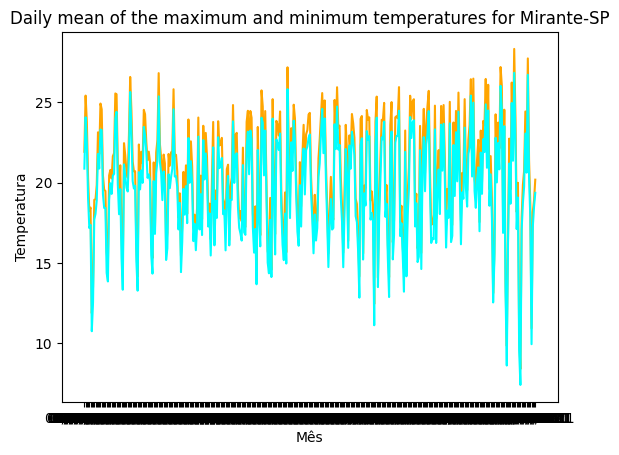

In [12]:
# Read the data from the CSV file
data = pd.read_csv('dataSeries/saopaulo_mirante_21.csv', sep=";")

data2 = data.copy()
data2 = data2.groupby(['Dia']).agg({'t_max':'mean', 't_min': 'mean'})
data2.reset_index(inplace=True)

# Create the axis object
fig, ax = plt.subplots()
print(data2)

# Plot the data as a time series
ax.plot(data2["Dia"], data2["t_max"], color= "orange")
ax.plot(data2["Dia"], data2["t_min"], color= "cyan")

# Defines the axis and the title
ax.set_xlabel('Mês')
ax.set_ylabel('Temperatura')
ax.set_title('Daily mean of the maximum and minimum temperatures for Mirante-SP')

# Prints the plot
plt.show()


The code below stabilishes a comparison between the two stations, and the respectives maximum and minimum temperatures, also with a daily mean calculated.

            Dia      t_max      t_min
0    01/01/2021  21.920833  20.870833
1    01/02/2021  25.420833  24.066667
2    01/03/2021  23.783333  22.483333
3    01/04/2021  20.291667  19.037500
4    01/05/2021  18.216667  17.166667
..          ...        ...        ...
360  31/05/2021  18.629167  17.808333
361  31/07/2021  10.925000   9.933333
362  31/08/2021  18.170833  17.220833
363  31/10/2021  18.875000  18.495833
364  31/12/2021  20.183333  19.362500

[365 rows x 3 columns]


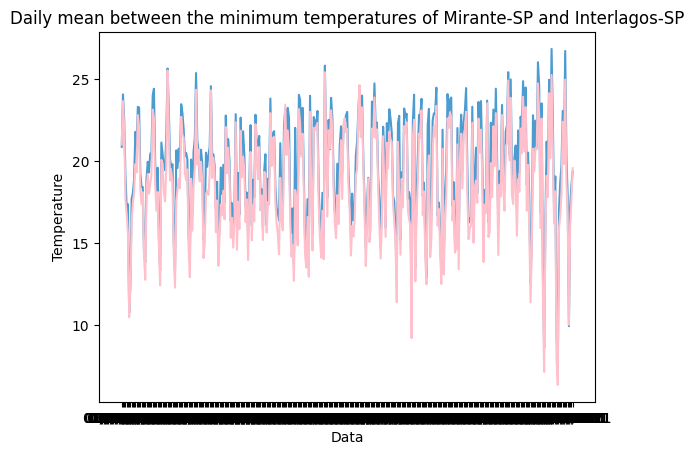

In [13]:
# Read the CSV data
mirante = pd.read_csv('dataSeries/saopaulo_mirante_21.csv', sep=";")
interlagos = pd.read_csv('dataSeries/saopaulo_interlagos_21.csv', sep=";")

data2 = mirante.copy()
data2 = data2.groupby(['Dia']).agg({'t_max':'mean', 't_min': 'mean'})
data2.reset_index(inplace=True)

# Create the axis object
fig, ax = plt.subplots()
print(data2)

# Plot the data as a temporal series
#ax.plot(data2["Dia"], data2["t_max"], color= "#f54e2c")
ax.plot(data2["Dia"], data2["t_min"], color= "#4b9cd1")

data2 = interlagos.copy()
data2 = data2.groupby(['Dia']).agg({'t_max':'mean', 't_min': 'mean'})
data2.reset_index(inplace=True)

#ax.plot(data2["Dia"], data2["t_max"], color= "black")
ax.plot(data2['Dia'], data2['t_min'], color='pink')

# Defines the axis and the title
ax.set_xlabel('Data')
ax.set_ylabel('Temperature')
ax.set_title('Daily mean between the minimum temperatures of Mirante-SP and Interlagos-SP')

# Shows the plot
plt.show()


Note that in the graph above, "Mirante" temperatures are displayed in blue, while "Interlagos" ones are displayed in pink

The next (and last) code plots the local maximum and minimum temperatures and compares them between both São Paulo weather stations while highlighting as a grey area, the ideal temperature range for the population long-term well being. This makes possible to observe, for example, which seasons are better overall for the health of the population in each location.

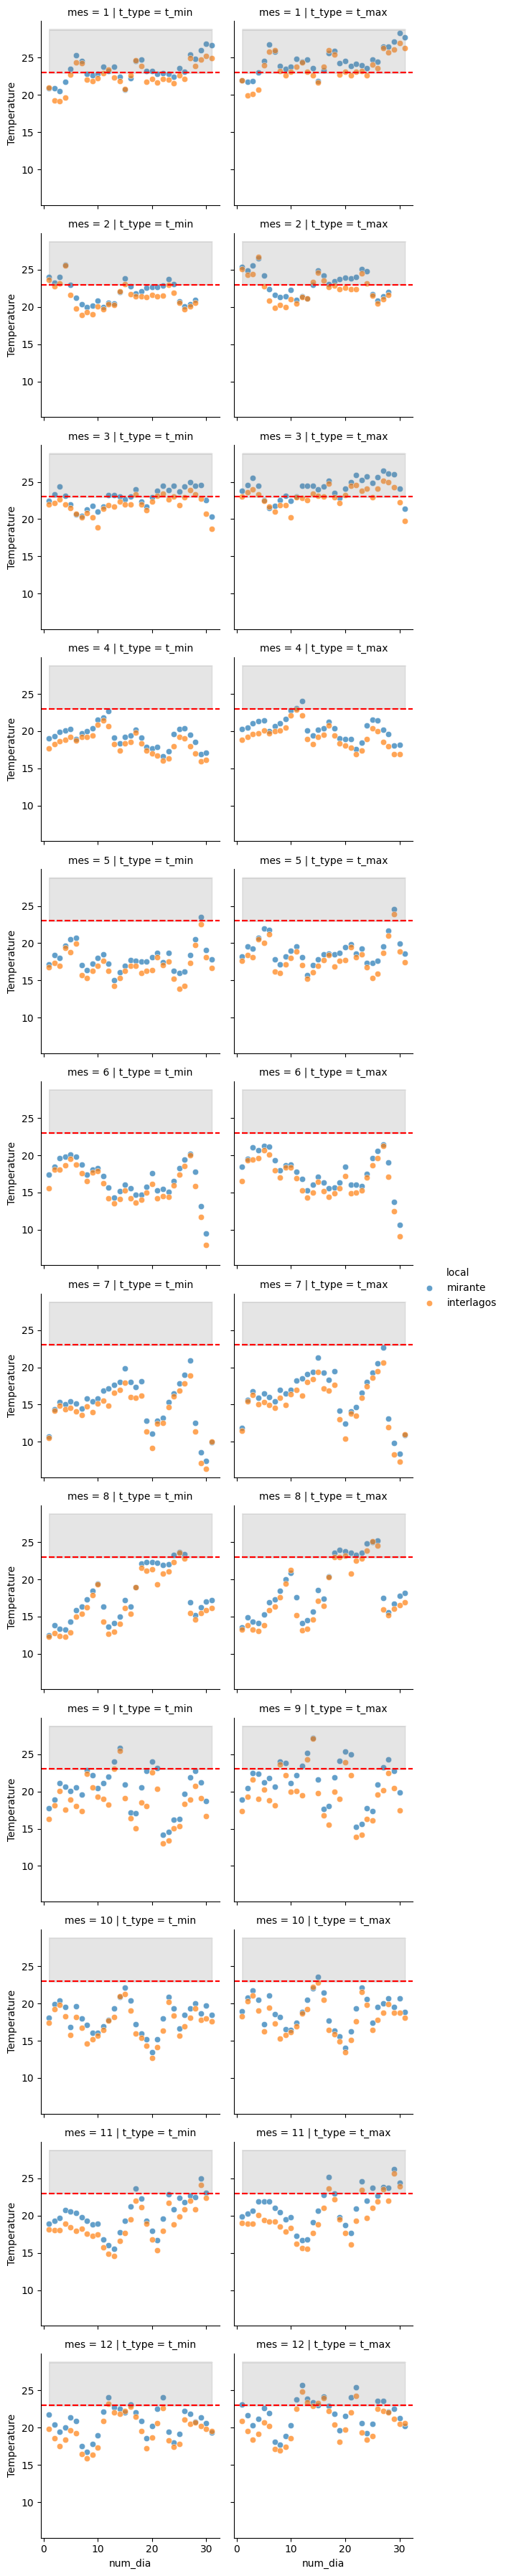

In [14]:
def create_dataframe(filename):
    data = pd.read_csv(filename, sep=';')
    data['mes'] = data['Dia'].apply(lambda x: int(x.split('/')[1]))
    filename = filename.split("/")[-1]
    data['local'] = [filename.split('_')[1]] * len(data)
    data['num_dia'] = data['Dia'].apply(lambda x: int(x.split('/')[0]))
    data['constante'] = [23] * len(data)
    data = data.groupby(['Dia', 'mes', 'local', 'constante', 'num_dia']).agg({'t_max': 'mean', 't_min': 'mean'})
    data.reset_index(inplace=True)

    return data


mirante = 'dataSeries/saopaulo_mirante_21.csv'
interlagos = 'dataSeries/saopaulo_interlagos_21.csv'
data_mirante = create_dataframe(mirante)
data_interlagos = create_dataframe(interlagos)

final_data = pd.concat([data_mirante, data_interlagos], axis=0, ignore_index=True)
final_data = final_data.melt(id_vars=['Dia', 'mes', 'local', 'constante', 'num_dia'], value_vars=['t_min', 't_max'], var_name='t_type', value_name="Temperature")

g = sns.FacetGrid(final_data, col='t_type', row="mes", hue="local")
g.refline(y=final_data["constante"].median(), color='red')
g.map(sns.scatterplot, "num_dia", "Temperature", alpha=.7)

for ax in g.axes.flat:
    ax.fill_between(final_data["num_dia"], 23, 28.8, color='gray', alpha=0.2)
    
g.add_legend()
plt.savefig('Images/out.png')

# Closing thoughts

Through the plotting and visualization of these graphs, it is possible to understand that, for São Paulo, the "Mirante" region tends to be warmer than the "Interlagos" one. Of course that with this simple visualizations it is not possible to jump into any concrete conclusions on the effects of the heat islands in São Paulo, but we can already see the patterns throughout the seasons and the year.